##### Kristie Kooken 
##### DSC540 Milestone 5

Assignment details: 
Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If you use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file.

Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

You must submit the following:
Jupyter Notebook File or PDF of your code with Milestone # listed.
Each transformation and visualization should be clearly labeled.
Human readable dataset after all transformations should be printed at the end of your notebook.
250-500 word summary of what you learned and a summary of the ethical implications. 

In [164]:
# loading libraries 

import random

import numpy as np
import pandas as pd

import statistics 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as a

import sqlite3


For this first step - I created .csv of all my dataframes for Milestone 2, 3, and 4 and now am reading them in 

In [57]:
# reading nutrition dataset from my local drive - milestone 2

nut = pd.read_csv('nutri_fin.csv')
nut

NUTR_FOOD_NAME  NUTR_SAT_FAT_g  \
0                                            Cornstarch             0.0   
1                                          Nuts, pecans             6.2   
2                                         Eggplant, raw             0.0   
3                                        Teff, uncooked             0.4   
4                                       Sherbet, orange             1.2   
...                                                 ...             ...   
8784  Beef, raw, all grades, trimmed to 0" fat, sepa...             1.4   
8785  Lamb, cooked, separable lean only, composite o...             3.9   
8786  Lamb, raw, separable lean and fat, composite o...            12.0   
8787  Beef, raw, all grades, trimmed to 0" fat, sepa...             1.1   
8788  Beef, raw, all grades, trimmed to 0" fat, sepa...             1.1   

      NUTR_SERV_SIZE_g  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  NUTR_CHOLEST_g  \
0                  100              381               0.1               0   
1                  100              691              72.0               0   
2                  100               25               0.2               0   
3                  100              367               2.4               0   
4                  100              144               2.0               1   
...                ...              ...               ...             ...   
8784               100              125               3.5              62   
8785               100              206               8.9             109   
8786               100              277              23.0              78   
8787               100              121               3.0              60   
8788               100              121               3.0              60   

      NUTR_SODIUM_mg  NUTR_CHOLINE_mg  NUTR_FOLATE_mcg  NUTR_FOLIC_ACID_mcg  \
0                9.0              0.4              0.0                  0.0   
1                0.0             40.5             22.0                  0.0   
2                2.0              6.9             22.0                  0.0   
3               12.0             13.1              0.0                  0.0   
4               46.0              7.7              4.0                  0.0   
...              ...              ...              ...                  ...   
8784            54.0             64.5              4.0                  0.0   
8785            50.0              0.0              0.0                  0.0   
8786            39.0              0.0              1.0                  0.0   
8787            53.0             64.2              4.0                  0.0   
8788            53.0             64.2              4.0                  0.0   

      ...  NUTR_ALCOHOL_g  NUTR_ASH_g  NUTR_CAFFEINE_mg  NUTR_THEOBROMINE_mg  \
0     ...             0.0        0.09               0.0                  0.0   
1     ...             0.0        1.49               0.0                  0.0   
2     ...             0.0        0.66               0.0                  0.0   
3     ...             0.0        2.37               0.0                  0.0   
4     ...             0.0        0.40               0.0                  0.0   
...   ...             ...         ...               ...                  ...   
8784  ...             0.0        1.11               0.0                  0.0   
8785  ...             0.0        1.60               0.0                  0.0   
8786  ...             0.0        0.92               0.0                  0.0   
8787  ...             0.0        1.10               0.0                  0.0   
8788  ...             0.0        1.10               0.0                  0.0   

      NUTR_WATER_g  CATEGORICAL_CAL   FOOD_CAT1        FOOD_CAT2   SOURCE_KEY  \
0             8.32           Medium  Cornstarch        Vegetable  NUTRITIONAL   
1             3.52             High        Nuts  Not Categorized  NUTRITIONAL   
2            92.30              Low    Eggplant        Vegetab

In [58]:
# grabbing the columns for below 
nut.columns

Index(['NUTR_FOOD_NAME', 'NUTR_SAT_FAT_g', 'NUTR_SERV_SIZE_g',
       'NUTR_CALORIES_g', 'NUTR_TOTAL_FAT_g', 'NUTR_CHOLEST_g',
       'NUTR_SODIUM_mg', 'NUTR_CHOLINE_mg', 'NUTR_FOLATE_mcg',
       'NUTR_FOLIC_ACID_mcg', 'NUTR_NIACIN_mg', 'NUTR_PANT_ACID_mg',
       'NUTR_RIBOFLAVIN_mg', 'NUTR_THIAMIN_mg', 'NUTR_VIT_A_IU',
       'NUTR_VIT_A_RAE_mcg', 'NUTR_CAROT_ALPHA_mcg', 'NUTR_CAROT_BETA_mcg',
       'NUTR_CRYPTO_BETA_mcg', 'NUTR_LUTEIN_ZEAX_mcg', 'NUTR_LUCOPENE',
       'NUTR_VIT_B12_mcg', 'NUTR_VIT_B6_mg', 'NUTR_VIT_C_mg', 'NUTR_VIT_D_IU',
       'NUTR_VIT_E_mg', 'NUTR_TOCOPHEROL_ALPHA_mg', 'NUTR_VIT_K_mcg',
       'NUTR_CALCIUM_mg', 'NUTR_COPPER_mg', 'NUTR_IRON_mg', 'NUTR_MAGNES_mg',
       'NUTR_MANGANESE_mg', 'NUTR_PHOSPHOROUS_mg', 'NUTR_POTASSIUM_mg',
       'NUTR_SELENIUM_mcg', 'NUTR_ZINC_mg', 'NUTR_PROTEIN_g', 'NUTR_ALANINE_g',
       'NUTR_ARGININE_g', 'NUTR_ASPART_ACID_g', 'NUTR_CYSTINE_g',
       'NUTR_GLUT_ACID_g', 'NUTR_GLYCINE_g', 'NUTR_HISTIDINE_g',
       'NUTR_HYDRO

In [59]:
# reading daily value web scrapping dataset from my local drive - milestone 3

dv = pd.read_csv('daily_web.csv')
dv

DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  DV_SODIUM_mg  DV_POTASSIUM_mg  \
0         72.0         20.0          300.0        2300.0           3500.0   

   DV_TOTCARB_mg  DV_ADDSUGAR_mg  DV_FIBER_mg  DV_PROTEIN_mg  DV_VITA_μg  ...  \
0          275.0            50.0         28.0           50.0       900.0  ...   

   DV_MAGNES_mg  DV_MANGAN_mg  DV_MOLY_μg  DV_PHOSP_mg  DV_SELEN_μg  \
0         420.0           2.3        45.0       1250.0         55.0   

   DV_ZINC_mg  DV_POTASSIUM_g  DV_MINSODIUM_g  DV_CHLORIDE_g  MRG_KEY  
0        11.0             4.7             2.3            2.3        1  

[1 rows x 38 columns]

In [60]:
dv.columns

Index(['DV_TOTFAT_g', 'DV_SATFAT_g', 'DV_CHOLEST_mg', 'DV_SODIUM_mg',
       'DV_POTASSIUM_mg', 'DV_TOTCARB_mg', 'DV_ADDSUGAR_mg', 'DV_FIBER_mg',
       'DV_PROTEIN_mg', 'DV_VITA_μg', 'DV_VITC_mg', 'DV_VITD_μg', 'DV_VITE_mg',
       'DV_VITK_μg', 'DV_VITB1_mg', 'DV_VITB2_mg', 'DV_VITB3_mg',
       'DV_VITB5_mg', 'DV_VITB6_mg', 'DV_VITB7_μg', 'DV_VITB9_μg',
       'DV_VITB12_μg', 'DV_CHOLINE_mg', 'DV_CALC_mg', 'DV_CHROM_μg',
       'DV_COP_μg', 'DV_IODINE_μg', 'DV_IRON_mg', 'DV_MAGNES_mg',
       'DV_MANGAN_mg', 'DV_MOLY_μg', 'DV_PHOSP_mg', 'DV_SELEN_μg',
       'DV_ZINC_mg', 'DV_POTASSIUM_g', 'DV_MINSODIUM_g', 'DV_CHLORIDE_g',
       'MRG_KEY'],
      dtype='object')

In [61]:
# reading restaurant API dataset from my local drive - milestone 4

rest = pd.read_csv('rest_api.csv')
rest

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g CATEGORICAL_CAL  \
0       Hamburger        A&W Restaurants           350.00          Medium   
1       Hamburger            The Varsity           200.00          Medium   
2       Hamburger            Black Angus           255.57          Medium   
3       Hamburger        Jack in the Box           340.00          Medium   
4       Hamburger            Nutrisystem           240.00          Medium   
..            ...                    ...              ...             ...   
77           Corn        Natural Grocers            60.00             Low   
78           Corn  Hale and Hearty Soups            35.00             Low   
79           Corn                Wrapido           100.00             Low   
80           Corn                 Chop't            45.00             Low   
81           Corn             Saladworks            25.00             Low   

    NUTR_TOTAL_FAT_g FOOD_CAT1  FOOD_CAT2  SOURCE_KEY  MRG_KEY  
0               11.0      Beef       Meat  RESTAURANT        1  
1                9.0      Beef       Meat  RESTAURANT        1  
2               20.0      Beef       Meat  RESTAURANT        1  
3               18.0      Beef       Meat  RESTAURANT        1  
4                8.0      Beef       Meat  RESTAURANT        1  
..               ...       ...        ...         ...      ...  
77               0.0      Corn  Vegetable  RESTAURANT        1  
78               0.5      Corn  Vegetable  RESTAURANT        1  
79               1.0      Corn  Vegetable  RESTAURANT        1  
80               0.0      Corn  Vegetable  RESTAURANT        1  
81               0.0      Corn  Vegetable  RESTAURANT        1  

[82 rows x 9 columns]

In [62]:
# creating a zero byte db
from pathlib import Path
Path('nutri.db').touch()

In [63]:
# creating connection to db and cursor to execute queries 
conn = sqlite3.connect('nutri.db')
c = conn.cursor()

In [64]:
c.execute('''CREATE TABLE nut (NUTR_FOOD_NAME text, 
        NUTR_SAT_FAT_g int, 
        NUTR_SERV_SIZE_g int,
        NUTR_CALORIES_g int, 
        NUTR_TOTAL_FAT_g int, 
        NUTR_CHOLEST_g int,
        NUTR_SODIUM_mg int, 
        NUTR_CHOLINE_mg int, 
        NUTR_FOLATE_mcg int,
        NUTR_FOLIC_ACID_mcg int, 
        NUTR_NIACIN_mg int, 
        NUTR_PANT_ACID_mg int,
        NUTR_RIBOFLAVIN_mg int,
        NUTR_THIAMIN_mg int, 
        NUTR_VIT_A_IU int,
        NUTR_VIT_A_RAE_mcg int, 
        NUTR_CAROT_ALPHA_mcg int, 
        NUTR_CAROT_BETA_mcg int,
        NUTR_CRYPTO_BETA_mcg int, 
        NUTR_LUTEIN_ZEAX_mcg int, 
        NUTR_LUCOPENE int,
        NUTR_VIT_B12_mcg int, 
        NUTR_VIT_B6_mg int, 
        NUTR_VIT_C_mg int, 
        NUTR_VIT_D_IU int,
        NUTR_VIT_E_mg int, 
        NUTR_TOCOPHEROL_ALPHA_mg int, 
        NUTR_VIT_K_mcg int,
        NUTR_CALCIUM_mg int, 
        NUTR_COPPER_mg int, 
        NUTR_IRON_mg int, 
        NUTR_MAGNES_mg int, 
        NUTR_MANGANESE_mg int, 
        NUTR_PHOSPHOROUS_mg int, 
        NUTR_POTASSIUM_mg int,
        NUTR_SELENIUM_mcg int, 
        NUTR_ZINC_mg int, 
        NUTR_PROTEIN_g int, 
        NUTR_ALANINE_g int,
        NUTR_ARGININE_g int, 
        NUTR_ASPART_ACID_g int, 
        NUTR_CYSTINE_g int,
        NUTR_GLUT_ACID_g int, 
        NUTR_GLYCINE_g int, 
        NUTR_HISTIDINE_g int,
        NUTR_HYDROXYPROLINE_g int, 
        NUTR_ISOLEUCINE_g int, 
        NUTR_LEUCINE_g int,
        NUTR_LYSINE_g int, 
        NUTR_METHIONINE_g int, 
        NUTR_PHENYL_g int, 
        NUTR_PROLINE_g int,
        NUTR_SERINE_g int, 
        NUTR_THREONINE_g int, 
        NUTR_TRYPTOPHAN_g int,
        NUTR_TYROSINE_g int, 
        NUTR_VALINE_g int, 
        NUTR_CARBOHYDRATE_g int,
        NUTR_FIBER_g int, 
        NUTR_SUGARS_g int, 
        NUTR_FRUCTOSE_g int, 
        NUTR_GALACTOSE_g int,
        NUTR_GLUCOSE_g int, 
        NUTR_LACTOSE_g int, 
        NUTR_MALTOSE_g int, 
        NUTR_SUCROSE_g int,
        NUTR_FAT_g int, 
        NUTR_SAT_FATTY_ACIDS_g int, 
        NUTR_MONO_FATTY_ACIDS_g int,
        NUTR_POLYUN_FATTY_ACIDS_g int, 
        NUTR_FATTY_ACIDS_TOTAL_TRANS_mg int,
        NUTR_ALCOHOL_g int, 
        NUTR_ASH_g int, 
        NUTR_CAFFEINE_mg int,
        NUTR_THEOBROMINE_mg int, 
        NUTR_WATER_g int, 
        CATEGORICAL_CAL text, 
        FOOD_CAT1 text,
        FOOD_CAT2 text, 
        SOURCE_KEY text,
        'MRG_KEY' int
        )''')

In [65]:
# reading the dataframe to sql milestone 2 data 
nut.to_sql("nut", conn, if_exists='replace', index = False)

8789

In [66]:
c.execute('''SELECT * FROM nut''').fetchall() 

[('Cornstarch',
  0.0,
  100,
  381,
  0.1,
  0,
  9.0,
  0.4,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.05,
  0.47,
  3.0,
  0.053,
  13.0,
  3.0,
  2.8,
  0.06,
  0.26,
  0.019,
  0.012,
  0.02,
  0.006,
  0.053,
  0.009,
  0.008,
  0.0,
  0.01,
  0.036,
  0.006,
  0.006,
  0.013,
  0.024,
  0.012,
  0.009,
  0.001,
  0.01,
  0.014,
  91.27,
  0.9,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.05,
  0.009,
  0.016,
  0.025,
  0.0,
  0.0,
  0.09,
  0.0,
  0.0,
  8.32,
  'Medium',
  'Cornstarch',
  'Vegetable',
  'NUTRITIONAL',
  1),
 ('Nuts, pecans',
  6.2,
  100,
  691,
  72.0,
  0,
  0.0,
  40.5,
  22.0,
  0.0,
  1.167,
  0.863,
  0.13,
  0.66,
  56.0,
  3.0,
  0.0,
  29.0,
  9.0,
  17.0,
  0,
  0.0,
  0.21,
  1.1,
  0.0,
  1.4,
  1.4,
  3.5,
  70.0,
  1.2,
  2.53,
  121.0,
  4.5,
  277.0,
  410.0,
  3.8,
  4.53,
  9.17,
  0.397,
  1.177,
  0.929,
  0.152,
  1.829,
  0.4

In [67]:
# creating a second table for dv 

c.execute('''CREATE TABLE dv (
        'DV_TOTFAT_g' int,
        'DV_SATFAT_g' int,
        'DV_CHOLEST_mg' int,
        'DV_SODIUM_mg' int,
        'DV_POTASSIUM_mg' int, 
        'DV_TOTCARB_mg' int, 
        'DV_ADDSUGAR_mg' int, 
        'DV_FIBER_mg' int,
        'DV_PROTEIN_mg' int,
        'DV_VITA_μg' int, 
        'DV_VITC_mg' int,
        'DV_VITD_μg' int, 
        'DV_VITE_mg' int,
        'DV_VITK_μg' int, 
        'DV_VITB1_mg' int,
        'DV_VITB2_mg' int, 
        'DV_VITB3_mg' int,
        'DV_VITB5_mg' int, 
        'DV_VITB6_mg' int, 
        'DV_VITB7_μg' int, 
        'DV_VITB9_μg' int,
        'DV_VITB12_μg' int,
        'DV_CHOLINE_mg' int,
        'DV_CALC_mg' int, 
        'DV_CHROM_μg' int,
        'DV_COP_μg' int, 
        'DV_IODINE_μg' int, 
        'DV_IRON_mg' int, 
        'DV_MAGNES_mg' int,
        'DV_MANGAN_mg' int, 
        'DV_MOLY_μg' int, 
        'DV_PHOSP_mg' int,
        'DV_SELEN_μg' int,
        'DV_ZINC_mg' int, 
        'DV_POTASSIUM_g' int,
        'DV_MINSODIUM_g' int,
        'DV_CHLORIDE_g' int,
        'MRG_KEY' int)''')

In [68]:
# load milestone 3 data to db
dv.to_sql('dv', conn, if_exists='append', index = False) # write to sqlite table

1

In [69]:
rest.columns

Index(['NUTR_FOOD_NAME', 'BRAND_NAME', 'NUTR_CALORIES_g', 'CATEGORICAL_CAL',
       'NUTR_TOTAL_FAT_g', 'FOOD_CAT1', 'FOOD_CAT2', 'SOURCE_KEY', 'MRG_KEY'],
      dtype='object')

In [70]:
# creating a third table for restaurant data

c.execute('''CREATE TABLE rest (
        'NUTR_FOOD_NAME' text,
        'BRAND_NAME' text, 
        'NUTR_CALORIES_g' int, 
        'CATEGORICAL_CAL' int,
        'NUTR_TOTAL_FAT_g' int, 
        'FOOD_CAT1' text, 
        'FOOD_CAT2' text, 
        'SOURCE_KEY' text,
        'MRG_KEY' int)''')

In [71]:
# load milestone 4 data to db
rest.to_sql('rest', conn, if_exists='append', index = False) # write to sqlite table

82

In [87]:
#conn.close()
# this is a test to practice though I am using pandas to do my actual merge for my final data frame
# this is the same query that I am writing below 

nm = '''SELECT u.NUTR_FOOD_NAME, u.NUTR_SAT_FAT_g, u.NUTR_SERV_SIZE_g, u.NUTR_CALORIES_g, 
                       u.NUTR_TOTAL_FAT_g, u.NUTR_CHOLEST_g, u.NUTR_SODIUM_mg, 
                       o.* FROM nut u LEFT JOIN dv o ON u.MRG_KEY = o.MRG_KEY'''

In [89]:
c.execute(nm)

In [90]:
result = c.fetchall()
for row in result:
    print(row)

('Cornstarch', 0.0, 100, 381, 0.1, 0, 9.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Nuts, pecans', 6.2, 100, 691, 72.0, 0, 0.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Eggplant, raw', 0.0, 100, 25, 0.2, 0, 2.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Teff, uncooked', 0.4, 100, 367, 2.4, 0, 12.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Sherbet, orange', 1.2, 100, 144, 2.0, 1, 46.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 

('Fast foods, with chili, hotdog', 4.3, 100, 260, 12.0, 45, 421.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Spices, red or cayenne, pepper', 3.3, 100, 318, 17.0, 0, 30.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
("MOTHER'S, Iced Oatmeal Cookies", 5.8, 100, 463, 18.0, 1, 493.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Chili, canned entree, no beans', 2.3, 100, 118, 7.1, 21, 411.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Burrito, frozen, beef and bean', 2

('Cookies, regular, peanut butter sandwich', 5.0, 100, 478, 21.0, 0, 368.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Dutch brand loaf, pork and beef, chicken', 8.8, 100, 273, 23.0, 60, 786.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Beverages, Diet Cran Cherry, OCEAN SPRAY', 0.0, 100, 4, 0.0, 0, 8.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Alcoholic beverage, sweet, dessert, wine', 0.0, 100, 160, 0.0, 0, 9.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('T

('Cookies, baked, refrigerated dough, chocolate chip', 7.8, 100, 492, 23.0, 27, 232.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Beverages, unsweetened, ready to drink, green, tea', 0.0, 100, 0, 0.0, 0, 7.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Cereals ready-to-eat, COUNT CHOCULA, GENERAL MILLS', 0.6, 100, 383, 4.7, 0, 488.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('MURRAY, Vanilla Creme Sandwich Cookies, SUGAR FREE', 7.5, 100, 467, 23.0, 0, 192.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.

('Squash, without salt, mashed, boiled, cooked, acorn, winter', 0.0, 100, 34, 0.1, 0, 3.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Nuts, lightly salted, with peanuts, oil roasted, mixed nuts', 8.7, 100, 607, 54.0, 0, 161.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Cookies, animal crackers (includes arrowroot, tea biscuits)', 3.5, 100, 446, 14.0, 0, 407.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Turkey breast, luncheon meat, prepackaged or deli, low salt', 0.2, 100, 109, 0.8, 44, 772.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4,

('Beef, cooked, select, trimmed to 1/8" fat, separable lean only, composite of trimmed retail cuts', 2.4, 100, 167, 6.4, 74, 51.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Beef, braised, cooked, all grades, trimmed to 0" fat, separable lean and fat, flat half, brisket', 3.2, 100, 213, 8.0, 92, 54.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Beef, raw, select, trimmed to 0" fat, separable lean and fat, boneless, shoulder top blade steak', 2.7, 100, 137, 6.2, 71, 86.0, 72, 20, 300, 2300, 3500, 275, 50, 28, 50, 900, 90, 20, 15, 120, 1.2, 1.3, 16, 5, 1.7, 30, 400, 2.4, 550, 1300, 35, 900, 150, 18, 420, 2.3, 45, 1250, 55, 11, 4.7, 2.3, 2.3, 1)
('Beef, grilled, cooked, choice, trimmed to 0" fat, separable lean only, boneless,

In [92]:
# this runs without error but is not what is needed - left join is not what is needed 
pd.read_sql('''SELECT * FROM rest u LEFT JOIN nut o ON u.SOURCE_KEY = o.SOURCE_KEY''', conn)

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g CATEGORICAL_CAL  \
0       Hamburger        A&W Restaurants           350.00          Medium   
1       Hamburger            The Varsity           200.00          Medium   
2       Hamburger            Black Angus           255.57          Medium   
3       Hamburger        Jack in the Box           340.00          Medium   
4       Hamburger            Nutrisystem           240.00          Medium   
..            ...                    ...              ...             ...   
77           Corn        Natural Grocers            60.00             Low   
78           Corn  Hale and Hearty Soups            35.00             Low   
79           Corn                Wrapido           100.00             Low   
80           Corn                 Chop't            45.00             Low   
81           Corn             Saladworks            25.00             Low   

    NUTR_TOTAL_FAT_g FOOD_CAT1  FOOD_CAT2  SOURCE_KEY MRG_KEY NUTR_FOOD_NAME  \
0               11.0      Beef       Meat  RESTAURANT       1           None   
1                9.0      Beef       Meat  RESTAURANT       1           None   
2               20.0      Beef       Meat  RESTAURANT       1           None   
3               18.0      Beef       Meat  RESTAURANT       1           None   
4                8.0      Beef       Meat  RESTAURANT       1           None   
..               ...       ...        ...         ...     ...            ...   
77               0.0      Corn  Vegetable  RESTAURANT       1           None   
78               0.5      Corn  Vegetable  RESTAURANT       1           None   
79               1.0      Corn  Vegetable  RESTAURANT       1           None   
80               0.0      Corn  Vegetable  RESTAURANT       1           None   
81               0.0      Corn  Vegetable  RESTAURANT       1           None   

    ... NUTR_ALCOHOL_g NUTR_ASH_g NUTR_CAFFEINE_mg NUTR_THEOBROMINE_mg  \
0   ...           None       None             None                None   
1   ...           None       None             None                None   
2   ...           None       None             None                None   
3   ...           None       None             None                None   
4   ...           None       None             None                None   
..  ...            ...        ...              ...                 ...   
77  ...           None       None             None                None   
78  ...           None       None             None                None   
79  ...           None       None             None                None   
80  ...           None       None             None                None   
81  ...           None       None             None                None   

   NUTR_WATER_g CATEGORICAL_CAL FOOD_CAT1 FOOD_CAT2 SOURCE_KEY MRG_KEY  
0          None            None      None      None       None    None  
1          None            None      None      None       None    None  
2          None            None      None      None       None    None  
3          None            None      None      None       None    None  
4          None            None      None      None       None    None  
..          ...             ...       ...       ...        ...     ...  
77         None            None      None      None       None    None  
78         None            None      None      None       None    None  
79         None            None      None      None       None    None  
80         None            None      None      None       None    None  
81         None            None      None      None       None    None  

[82 rows x 90 columns]

In [93]:
# finally a merge that looks like it should nutri and dv - this is not used but works fine
nutdv = pd.read_sql('''SELECT u.NUTR_FOOD_NAME, u.NUTR_SAT_FAT_g, u.NUTR_SERV_SIZE_g, u.NUTR_CALORIES_g, 
                       u.NUTR_TOTAL_FAT_g, u.NUTR_CHOLEST_g, u.NUTR_SODIUM_mg, 
                       o.* FROM nut u LEFT JOIN dv o ON u.MRG_KEY = o.MRG_KEY''', conn)

In [94]:
# rest and dv - this is not used but works fine 
restdv = pd.read_sql('''SELECT * FROM rest u LEFT JOIN dv o ON u.MRG_KEY = o.MRG_KEY''', conn)

Merging my data took me awhile to sort out. I could do this in sqlite but ran into issues earlier with not understanding that a main merge was adding records to a table and still using a merge key. Time permitting I will go back and practice this for my own understanding. However, the below sections are my official merges for Milestone 5 to produce my final dataframe.

In [281]:
# rest only (can't include dv as it is on the other df already)
restf = pd.read_sql('''SELECT * FROM rest WHERE FOOD_CAT2 != "Not Categorized"''', conn)

In [282]:
restf['FOOD_CAT2'].value_counts()

Vegetable    36
Meat         26
Name: FOOD_CAT2, dtype: int64

In [284]:
# nut only (can't include dv because if I merge too early then I get an issue/errors with the duplicate names)
# removing records where food cat2 is not categorized 
# keeping subset of variables 
nutf = pd.read_sql('''SELECT NUTR_FOOD_NAME, NUTR_CALORIES_g, NUTR_TOTAL_FAT_g, 
                      CATEGORICAL_CAL, FOOD_CAT1, FOOD_CAT2, SOURCE_KEY,
                      MRG_KEY FROM nut WHERE FOOD_CAT2 != "Not Categorized"''', conn)
nutf

NUTR_FOOD_NAME  NUTR_CALORIES_g  \
0                                            Cornstarch              381   
1                                         Eggplant, raw               25   
2                                     Lamb, raw, ground              282   
3                                 Chicken, boiled, feet              215   
4                                Grapes, raw, muscadine               57   
...                                                 ...              ...   
2096  Beef, raw, all grades, trimmed to 0" fat, sepa...              125   
2097  Lamb, cooked, separable lean only, composite o...              206   
2098  Lamb, raw, separable lean and fat, composite o...              277   
2099  Beef, raw, all grades, trimmed to 0" fat, sepa...              121   
2100  Beef, raw, all grades, trimmed to 0" fat, sepa...              121   

      NUTR_TOTAL_FAT_g CATEGORICAL_CAL   FOOD_CAT1  FOOD_CAT2   SOURCE_KEY  \
0                  0.1          Medium  Cornstarch  Vegetable  NUTRITIONAL   
1                  0.2             Low    Eggplant  Vegetable  NUTRITIONAL   
2                 23.0          Medium        Lamb       Meat  NUTRITIONAL   
3                 15.0          Medium     Chicken       Meat  NUTRITIONAL   
4                  0.5             Low      Grapes      Fruit  NUTRITIONAL   
...                ...             ...         ...        ...          ...   
2096               3.5          Medium        Beef       Meat  NUTRITIONAL   
2097               8.9          Medium        Lamb       Meat  NUTRITIONAL   
2098              23.0          Medium        Lamb       Meat  NUTRITIONAL   
2099               3.0          Medium        Beef       Meat  NUTRITIONAL   
2100               3.0          Medium        Beef       Meat  NUTRITIONAL   

      MRG_KEY  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
2096        1  
2097        1  
2098        1  
2099        1  
2100        1  

[2101 rows x 8 columns]

In [285]:
nutf['FOOD_CAT2'].value_counts()

Meat         1943
Vegetable      91
Fruit          67
Name: FOOD_CAT2, dtype: int64

In [286]:
# daily value only - taking a subset of the variables available 
dvf = pd.read_sql('''SELECT DV_TOTFAT_g, DV_SATFAT_g, DV_CHOLEST_mg, DV_SODIUM_mg, DV_POTASSIUM_mg, DV_TOTCARB_mg,
                     DV_ADDSUGAR_mg, DV_FIBER_mg, DV_PROTEIN_mg, MRG_KEY FROM dv''', conn)
dvf

DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  DV_SODIUM_mg  DV_POTASSIUM_mg  \
0           72           20            300          2300             3500   

   DV_TOTCARB_mg  DV_ADDSUGAR_mg  DV_FIBER_mg  DV_PROTEIN_mg  MRG_KEY  
0            275              50           28             50        1

In [287]:
# lesson learned - I am concatenating and not merge - initially my plan was to merge using the source key but 
# after my api issues (of not being able to get the data I planned to) - I became more limited with my selection. 
# My SOURCE_KEY looks now as I expect it - where the two data sources are stacked 
nutrest = pd.concat([nutf, restf])
nutrest

NUTR_FOOD_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g CATEGORICAL_CAL  \
0               Cornstarch            381.0               0.1          Medium   
1            Eggplant, raw             25.0               0.2             Low   
2        Lamb, raw, ground            282.0              23.0          Medium   
3    Chicken, boiled, feet            215.0              15.0          Medium   
4   Grapes, raw, muscadine             57.0               0.5             Low   
..                     ...              ...               ...             ...   
57                    Corn             60.0               0.0             Low   
58                    Corn             35.0               0.5             Low   
59                    Corn            100.0               1.0             Low   
60                    Corn             45.0               0.0             Low   
61                    Corn             25.0               0.0             Low   

     FOOD_CAT1  FOOD_CAT2   SOURCE_KEY  MRG_KEY             BRAND_NAME  
0   Cornstarch  Vegetable  NUTRITIONAL        1                    NaN  
1     Eggplant  Vegetable  NUTRITIONAL        1                    NaN  
2         Lamb       Meat  NUTRITIONAL        1                    NaN  
3      Chicken       Meat  NUTRITIONAL        1                    NaN  
4       Grapes      Fruit  NUTRITIONAL        1                    NaN  
..         ...        ...          ...      ...                    ...  
57        Corn  Vegetable   RESTAURANT        1        Natural Grocers  
58        Corn  Vegetable   RESTAURANT        1  Hale and Hearty Soups  
59        Corn  Vegetable   RESTAURANT        1                Wrapido  
60        Corn  Vegetable   RESTAURANT        1                 Chop't  
61        Corn  Vegetable   RESTAURANT        1             Saladworks  

[2163 rows x 9 columns]

In [288]:
# for this merge - whether I use inner or outer is not relevent - the idea is to have the daily value data on every row 
finaldf = pd.merge(nutrest, dvf, how="inner", on=["MRG_KEY"])
finaldf

NUTR_FOOD_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
0                 Cornstarch            381.0               0.1   
1              Eggplant, raw             25.0               0.2   
2          Lamb, raw, ground            282.0              23.0   
3      Chicken, boiled, feet            215.0              15.0   
4     Grapes, raw, muscadine             57.0               0.5   
...                      ...              ...               ...   
2158                    Corn             60.0               0.0   
2159                    Corn             35.0               0.5   
2160                    Corn            100.0               1.0   
2161                    Corn             45.0               0.0   
2162                    Corn             25.0               0.0   

     CATEGORICAL_CAL   FOOD_CAT1  FOOD_CAT2   SOURCE_KEY  MRG_KEY  \
0             Medium  Cornstarch  Vegetable  NUTRITIONAL        1   
1                Low    Eggplant  Vegetable  NUTRITIONAL        1   
2             Medium        Lamb       Meat  NUTRITIONAL        1   
3             Medium     Chicken       Meat  NUTRITIONAL        1   
4                Low      Grapes      Fruit  NUTRITIONAL        1   
...              ...         ...        ...          ...      ...   
2158             Low        Corn  Vegetable   RESTAURANT        1   
2159             Low        Corn  Vegetable   RESTAURANT        1   
2160             Low        Corn  Vegetable   RESTAURANT        1   
2161             Low        Corn  Vegetable   RESTAURANT        1   
2162             Low        Corn  Vegetable   RESTAURANT        1   

                 BRAND_NAME  DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  \
0                       NaN           72           20            300   
1                       NaN           72           20            300   
2                       NaN           72           20            300   
3                       NaN           72           20            300   
4                       NaN           72           20            300   
...                     ...          ...          ...            ...   
2158        Natural Grocers           72           20            300   
2159  Hale and Hearty Soups           72           20            300   
2160                Wrapido           72           20            300   
2161                 Chop't           72           20            300   
2162             Saladworks           72           20            300   

      DV_SODIUM_mg  DV_POTASSIUM_mg  DV_TOTCARB_mg  DV_ADDSUGAR_mg  \
0             2300             3500            275              50   
1             2300             3500            275              50   
2             2300             3500            275              50   
3             2300             3500            275              50   
4             2300             3500            275              50   
...            ...              ...            ...             ...   
2158          2300             3500            275              50   
2159          2300             3500            275              50   
2160          2300             3500            275              50   
2161          2300             3500            275              50   
2162          2300             3500            275              50   

      DV_FIBER_mg  DV_PROTEIN_mg  
0              28             50  
1              28             50  
2              28             50  
3              28             50  
4              28             50  
...           ...            ...  
2158           28             50  
2159           28             50  
2160           28             50  
2161           28             50  
2162           28             50  

[2163 rows x 18 columns]

This section begin the visualizations 

In [289]:
# looking at the final columns
finaldf.columns

Index(['NUTR_FOOD_NAME', 'NUTR_CALORIES_g', 'NUTR_TOTAL_FAT_g',
       'CATEGORICAL_CAL', 'FOOD_CAT1', 'FOOD_CAT2', 'SOURCE_KEY', 'MRG_KEY',
       'BRAND_NAME', 'DV_TOTFAT_g', 'DV_SATFAT_g', 'DV_CHOLEST_mg',
       'DV_SODIUM_mg', 'DV_POTASSIUM_mg', 'DV_TOTCARB_mg', 'DV_ADDSUGAR_mg',
       'DV_FIBER_mg', 'DV_PROTEIN_mg'],
      dtype='object')

In [290]:
# creating a filter and doing a small amount of data clean up in FOOD_CAT1 column 
#'Cornstarch', 'Lambsquarters', 'Cornsalad', 'Cornmeal','Corned', 'Strawberry-flavor'

filt = (finaldf['FOOD_CAT1'] == 'Cornstarch')|(finaldf['FOOD_CAT1'] == 'Lambsquarters')|(finaldf['FOOD_CAT1'] == 'Cornsalad')|(finaldf['FOOD_CAT1'] == 'Cornmeal')| (finaldf['FOOD_CAT1'] == 'Corned')| (finaldf['FOOD_CAT1'] == 'Strawberry-flavor')

In [291]:
# this is a good filtering method which took me likely too long to figure out 

finaldf1 = finaldf.loc[~filt]
finaldf1

NUTR_FOOD_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
1              Eggplant, raw             25.0               0.2   
2          Lamb, raw, ground            282.0              23.0   
3      Chicken, boiled, feet            215.0              15.0   
4     Grapes, raw, muscadine             57.0               0.5   
5      Fish, raw, sheepshead            108.0               2.4   
...                      ...              ...               ...   
2158                    Corn             60.0               0.0   
2159                    Corn             35.0               0.5   
2160                    Corn            100.0               1.0   
2161                    Corn             45.0               0.0   
2162                    Corn             25.0               0.0   

     CATEGORICAL_CAL FOOD_CAT1  FOOD_CAT2   SOURCE_KEY  MRG_KEY  \
1                Low  Eggplant  Vegetable  NUTRITIONAL        1   
2             Medium      Lamb       Meat  NUTRITIONAL        1   
3             Medium   Chicken       Meat  NUTRITIONAL        1   
4                Low    Grapes      Fruit  NUTRITIONAL        1   
5                Low      Fish       Meat  NUTRITIONAL        1   
...              ...       ...        ...          ...      ...   
2158             Low      Corn  Vegetable   RESTAURANT        1   
2159             Low      Corn  Vegetable   RESTAURANT        1   
2160             Low      Corn  Vegetable   RESTAURANT        1   
2161             Low      Corn  Vegetable   RESTAURANT        1   
2162             Low      Corn  Vegetable   RESTAURANT        1   

                 BRAND_NAME  DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  \
1                       NaN           72           20            300   
2                       NaN           72           20            300   
3                       NaN           72           20            300   
4                       NaN           72           20            300   
5                       NaN           72           20            300   
...                     ...          ...          ...            ...   
2158        Natural Grocers           72           20            300   
2159  Hale and Hearty Soups           72           20            300   
2160                Wrapido           72           20            300   
2161                 Chop't           72           20            300   
2162             Saladworks           72           20            300   

      DV_SODIUM_mg  DV_POTASSIUM_mg  DV_TOTCARB_mg  DV_ADDSUGAR_mg  \
1             2300             3500            275              50   
2             2300             3500            275              50   
3             2300             3500            275              50   
4             2300             3500            275              50   
5             2300             3500            275              50   
...            ...              ...            ...             ...   
2158          2300             3500            275              50   
2159          2300             3500            275              50   
2160          2300             3500            275              50   
2161          2300             3500            275              50   
2162          2300             3500            275              50   

      DV_FIBER_mg  DV_PROTEIN_mg  
1              28             50  
2              28             50  
3              28             50  
4              28             50  
5              28             50  
...           ...            ...  
2158           28             50  
2159           28             50  
2160           28             50  
2161           28             50  
2162           28             50  

[2138 rows x 18 columns]

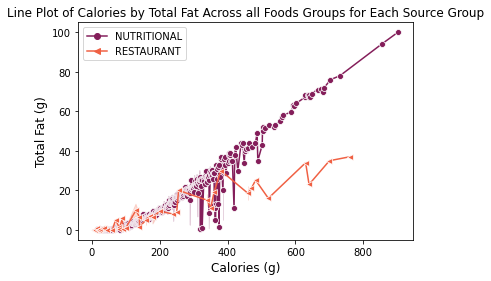

In [329]:
# First visualization
# line plot for all food groups 
ax = sns.lineplot(x = "NUTR_CALORIES_g", y = "NUTR_TOTAL_FAT_g", data=finaldf1, hue = "SOURCE_KEY",
            style = "SOURCE_KEY", palette = "rocket", dashes = False, 
            markers = ["o", "<"],  legend="brief",)

ax.set_title("Line Plot of Calories by Total Fat Across all Foods Groups for Each Source Group");
ax.legend(loc='upper left');
ax.set_ylabel("Total Fat (g)", fontsize = 12);
ax.set_xlabel("Calories (g)", fontsize = 12);

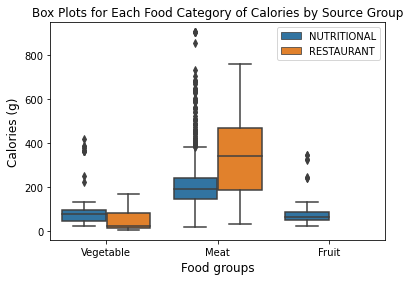

In [330]:
# 2nd visualization box plots for each food group

ax = sns.boxplot(data=finaldf1, x="FOOD_CAT2", y="NUTR_CALORIES_g",  hue="SOURCE_KEY")
ax.set_xlabel("Food groups", fontsize = 12);
ax.set_ylabel("Calories (g)", fontsize = 12);
ax.legend(loc='upper right');
ax.set_title('Box Plots for Each Food Category of Calories by Source Group');


In [348]:
dd = finaldf1['FOOD_CAT2'].value_counts()
dd

Meat         1964
Vegetable     108
Fruit          66
Name: FOOD_CAT2, dtype: int64

In [357]:
# this is not efficent but I will investigate a more automated way to do this in the future
# this is a simple visualization to demonstrate that the Meat category is the largest in this dataset

data = [1964, 108, 66]
keys = ['Meat', 'Vegetable', 'Fruit']
explode = [0, .1, 0]

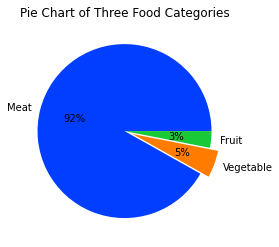

In [361]:
# creating a pie chart to look at percentage in each category
palette_color = sns.color_palette('bright')
plt.title('Pie Chart of Three Food Categories');
ax = plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%');



In [362]:
# creating a subset for the visualization to focus on this larger category
dfp1 = finaldf1.loc[(finaldf1['FOOD_CAT2'] == 'Meat')]
dfp1

NUTR_FOOD_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
2         Lamb, raw, ground            282.0              23.0   
3     Chicken, boiled, feet            215.0              15.0   
5     Fish, raw, sheepshead            108.0               2.4   
6     Fish, smoked, haddock            116.0               1.0   
7     Beef, pastrami, cured            147.0               5.8   
...                     ...              ...               ...   
2122                  Steak             30.0               1.5   
2123                  Steak            200.0              10.0   
2124                  Steak            140.0               5.0   
2125                  Steak            380.0              30.0   
2126                  Steak            180.0              10.0   

     CATEGORICAL_CAL FOOD_CAT1 FOOD_CAT2   SOURCE_KEY  MRG_KEY  \
2             Medium      Lamb      Meat  NUTRITIONAL        1   
3             Medium   Chicken      Meat  NUTRITIONAL        1   
5                Low      Fish      Meat  NUTRITIONAL        1   
6                Low      Fish      Meat  NUTRITIONAL        1   
7             Medium      Beef      Meat  NUTRITIONAL        1   
...              ...       ...       ...          ...      ...   
2122             Low      Beef      Meat   RESTAURANT        1   
2123          Medium      Beef      Meat   RESTAURANT        1   
2124          Medium      Beef      Meat   RESTAURANT        1   
2125          Medium      Beef      Meat   RESTAURANT        1   
2126          Medium      Beef      Meat   RESTAURANT        1   

                     BRAND_NAME  DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  \
2                           NaN           72           20            300   
3                           NaN           72           20            300   
5                           NaN           72           20            300   
6                           NaN           72           20            300   
7                           NaN           72           20            300   
...                         ...          ...          ...            ...   
2122  Salsarita's Fresh Cantina           72           20            300   
2123        Hummus And Pita Co.           72           20            300   
2124                Great Steak           72           20            300   
2125               Omaha Steaks           72           20            300   
2126                 Barberitos           72           20            300   

      DV_SODIUM_mg  DV_POTASSIUM_mg  DV_TOTCARB_mg  DV_ADDSUGAR_mg  \
2             2300             3500            275              50   
3             2300             3500            275              50   
5             2300             3500            275              50   
6             2300             3500            275              50   
7             2300             3500            275              50   
...            ...              ...            ...             ...   
2122          2300             3500            275              50   
2123          2300             3500            275              50   
2124          2300             3500            275              50   
2125          2300             3500            275              50   
2126          2300             3500            275              50   

      DV_FIBER_mg  DV_PROTEIN_mg  
2              28             50  
3              28             50  
5              28             50  
6              28             50  
7              28             50  
...           ...            ...  
2122           28             50  
2123           28             50  
2124           28             50  
2125           28             50  
2126           28             50  

[1964 rows x 18 columns]

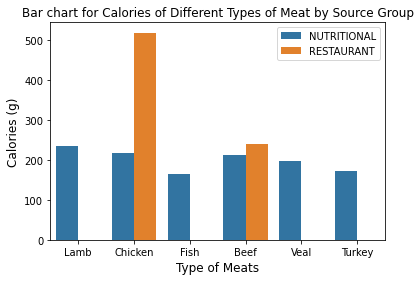

In [363]:
# third visualization 

ax = sns.barplot(x='FOOD_CAT1', y='NUTR_CALORIES_g', hue = 'SOURCE_KEY', data = dfp1, ci=None)
ax.set_xlabel("Type of Meats", fontsize = 12);
ax.set_ylabel("Calories (g)", fontsize = 12);
ax.legend(loc='upper right');
ax.set_title('Bar chart for Calories of Different Types of Meat by Source Group');

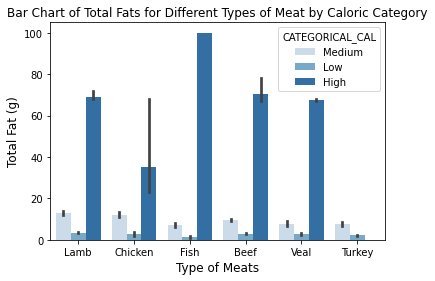

In [364]:
# third visualization - doing a second visualization bar chart with different variables 

ax = sns.barplot(x='FOOD_CAT1', y='NUTR_TOTAL_FAT_g', estimator = np.median, hue = 'CATEGORICAL_CAL', data = dfp1, palette = "Blues")
ax.set_xlabel("Type of Meats", fontsize = 12);
ax.set_ylabel("Total Fat (g)", fontsize = 12);
ax.set_title('Bar Chart of Total Fats for Different Types of Meat by Caloric Category');

In [365]:
# creating a subset for the visualization 
dfp2 = finaldf1.loc[(finaldf1['FOOD_CAT1'] == 'Chicken')]
dfp2

NUTR_FOOD_NAME  NUTR_CALORIES_g  \
3                       Chicken, boiled, feet            215.0   
13                       Chicken, raw, ground            143.0   
35                          Chicken, meatless            224.0   
48                             Chicken spread            158.0   
60              Chicken, raw, giblets, capons            130.0   
...                                       ...              ...   
2116                   Spicy Chicken Sandwich            360.0   
2117                   Chicken Salad Sandwich            460.0   
2118                  Crispy Chicken Sandwich            760.0   
2119  Flatbread Pocket Sandwich, Chicken Melt            160.0   
2120                 Buffalo Chicken Sandwich            700.0   

      NUTR_TOTAL_FAT_g CATEGORICAL_CAL FOOD_CAT1 FOOD_CAT2   SOURCE_KEY  \
3                 15.0          Medium   Chicken      Meat  NUTRITIONAL   
13                 8.1          Medium   Chicken      Meat  NUTRITIONAL   
35                13.0          Medium   Chicken      Meat  NUTRITIONAL   
48                18.0          Medium   Chicken      Meat  NUTRITIONAL   
60                 5.2          Medium   Chicken      Meat  NUTRITIONAL   
...                ...             ...       ...       ...          ...   
2116              19.0          Medium   Chicken      Meat   RESTAURANT   
2117              15.0          Medium   Chicken      Meat   RESTAURANT   
2118              37.0            High   Chicken      Meat   RESTAURANT   
2119               8.0          Medium   Chicken      Meat   RESTAURANT   
2120              35.0            High   Chicken      Meat   RESTAURANT   

      MRG_KEY         BRAND_NAME  DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  \
3           1                NaN           72           20            300   
13          1                NaN           72           20            300   
35          1                NaN           72           20            300   
48          1                NaN           72           20            300   
60          1                NaN           72           20            300   
...       ...                ...          ...          ...            ...   
2116        1   Church's Chicken           72           20            300   
2117        1     Cowboy Chicken           72           20            300   
2118        1     Cowboy Chicken           72           20            300   
2119        1     Sandwich Bros.           72           20            300   
2120        1  Chester's Chicken           72           20            300   

      DV_SODIUM_mg  DV_POTASSIUM_mg  DV_TOTCARB_mg  DV_ADDSUGAR_mg  \
3             2300             3500            275              50   
13            2300             3500            275              50   
35            2300             3500            275              50   
48            2300             3500            275              50   
60            2300             3500            275              50   
...            ...              ...            ...             ...   
2116          2300             3500            275              50   
2117          2300             3500            275              50   
2118          2300             3500            275              50   
2119          2300             3500            275              50   
2120          2300             3500            275              50   

      DV_FIBER_mg  DV_PROTEIN_mg  
3              28             50  
13             28             50  
35             28             50  
48             28             50  
60             28             50  
...           ...            ...  
2116           28             50  
2117           28             50  
2118           28             50  
2119           28             50  
2120           28             50  

[224 rows x 18 columns]

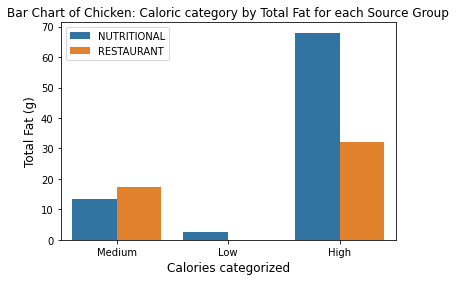

In [366]:
# fourth visualization - deeper look at chicken 

ax = sns.barplot(x='CATEGORICAL_CAL', y='NUTR_TOTAL_FAT_g', hue = 'SOURCE_KEY', data = dfp2, ci=None)
ax.set_xlabel("Calories categorized", fontsize = 12);
ax.set_ylabel("Total Fat (g)", fontsize = 12);
ax.legend(loc='upper left');
ax.set_title('Bar Chart of Chicken: Caloric category by Total Fat for each Source Group');


In [369]:
# creating a subset for the visualization 
dfp3 = finaldf1.loc[(finaldf1['FOOD_CAT1'] == 'Chicken') & (finaldf1['CATEGORICAL_CAL'] == 'High')]
dfp3

NUTR_FOOD_NAME  NUTR_CALORIES_g  \
401   Chicken, raw, separable fat, broilers or fryers            629.0   
2112                                 Chicken Sandwich            630.0   
2115                             BBQ Chicken Sandwich            640.0   
2118                          Crispy Chicken Sandwich            760.0   
2120                         Buffalo Chicken Sandwich            700.0   

      NUTR_TOTAL_FAT_g CATEGORICAL_CAL FOOD_CAT1 FOOD_CAT2   SOURCE_KEY  \
401               68.0            High   Chicken      Meat  NUTRITIONAL   
2112              34.0            High   Chicken      Meat   RESTAURANT   
2115              23.0            High   Chicken      Meat   RESTAURANT   
2118              37.0            High   Chicken      Meat   RESTAURANT   
2120              35.0            High   Chicken      Meat   RESTAURANT   

      MRG_KEY         BRAND_NAME  DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  \
401         1                NaN           72           20            300   
2112        1      Chicken Shack           72           20            300   
2115        1     Cowboy Chicken           72           20            300   
2118        1     Cowboy Chicken           72           20            300   
2120        1  Chester's Chicken           72           20            300   

      DV_SODIUM_mg  DV_POTASSIUM_mg  DV_TOTCARB_mg  DV_ADDSUGAR_mg  \
401           2300             3500            275              50   
2112          2300             3500            275              50   
2115          2300             3500            275              50   
2118          2300             3500            275              50   
2120          2300             3500            275              50   

      DV_FIBER_mg  DV_PROTEIN_mg  
401            28             50  
2112           28             50  
2115           28             50  
2118           28             50  
2120           28             50

In [371]:
cx = dfp3['SOURCE_KEY'].value_counts()
cx

RESTAURANT     4
NUTRITIONAL    1
Name: SOURCE_KEY, dtype: int64

In [374]:
# creating another simple pie to demonstrate what is going on in the chicken category

data = [1, 4]
keys = ['Nutritional', 'Restaurant']
explode = [0, .1]

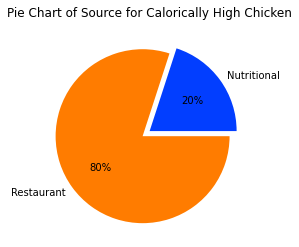

In [375]:
# creating a pie chart to look at percentage in each category
palette_color = sns.color_palette('bright')
plt.title('Pie Chart of Source for Calorically High Chicken');
ax = plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%');

In [376]:
# creating one new variable to use DV values 
# total fat is 72 - this calculation makes an assumption that you eat 3 meals a day and total fat is divided by each meal 

def dvfun (cal, dv):
    if cal > dv:
        return("Over Max")
    if cal <= dv:
        return("Under Max")
    

dfp1["DV_FATYN"] = dfp1["NUTR_TOTAL_FAT_g"].apply(dvfun, args=[72/3])
dfp1

C:\Users\kkooken\AppData\Local\Temp\ipykernel_24376\260542452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp1["DV_FATYN"] = dfp1["NUTR_TOTAL_FAT_g"].apply(dvfun, args=[72/3])


NUTR_FOOD_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
2         Lamb, raw, ground            282.0              23.0   
3     Chicken, boiled, feet            215.0              15.0   
5     Fish, raw, sheepshead            108.0               2.4   
6     Fish, smoked, haddock            116.0               1.0   
7     Beef, pastrami, cured            147.0               5.8   
...                     ...              ...               ...   
2122                  Steak             30.0               1.5   
2123                  Steak            200.0              10.0   
2124                  Steak            140.0               5.0   
2125                  Steak            380.0              30.0   
2126                  Steak            180.0              10.0   

     CATEGORICAL_CAL FOOD_CAT1 FOOD_CAT2   SOURCE_KEY  MRG_KEY  \
2             Medium      Lamb      Meat  NUTRITIONAL        1   
3             Medium   Chicken      Meat  NUTRITIONAL        1   
5                Low      Fish      Meat  NUTRITIONAL        1   
6                Low      Fish      Meat  NUTRITIONAL        1   
7             Medium      Beef      Meat  NUTRITIONAL        1   
...              ...       ...       ...          ...      ...   
2122             Low      Beef      Meat   RESTAURANT        1   
2123          Medium      Beef      Meat   RESTAURANT        1   
2124          Medium      Beef      Meat   RESTAURANT        1   
2125          Medium      Beef      Meat   RESTAURANT        1   
2126          Medium      Beef      Meat   RESTAURANT        1   

                     BRAND_NAME  DV_TOTFAT_g  DV_SATFAT_g  DV_CHOLEST_mg  \
2                           NaN           72           20            300   
3                           NaN           72           20            300   
5                           NaN           72           20            300   
6                           NaN           72           20            300   
7                           NaN           72           20            300   
...                         ...          ...          ...            ...   
2122  Salsarita's Fresh Cantina           72           20            300   
2123        Hummus And Pita Co.           72           20            300   
2124                Great Steak           72           20            300   
2125               Omaha Steaks           72           20            300   
2126                 Barberitos           72           20            300   

      DV_SODIUM_mg  DV_POTASSIUM_mg  DV_TOTCARB_mg  DV_ADDSUGAR_mg  \
2             2300             3500            275              50   
3             2300             3500            275              50   
5             2300             3500            275              50   
6             2300             3500            275              50   
7             2300             3500            275              50   
...            ...              ...            ...             ...   
2122          2300             3500            275              50   
2123          2300             3500            275              50   
2124          2300             3500            275              50   
2125          2300             3500            275              50   
2126          2300             3500            275              50   

      DV_FIBER_mg  DV_PROTEIN_mg   DV_FATYN  
2              28             50  Under Max  
3              28             50  Under Max  
5              28             50  Under Max  
6              28             50  Under Max  
7              28             50  Under Max  
...           ...            ...        ...  
2122           28             50  Under Max  
2123           28             50  Under Max  
2124           28             50  Under Max  
2125           28             50   Over Max  
2126           28             50  Under Max  

[1964 rows x 19 columns]

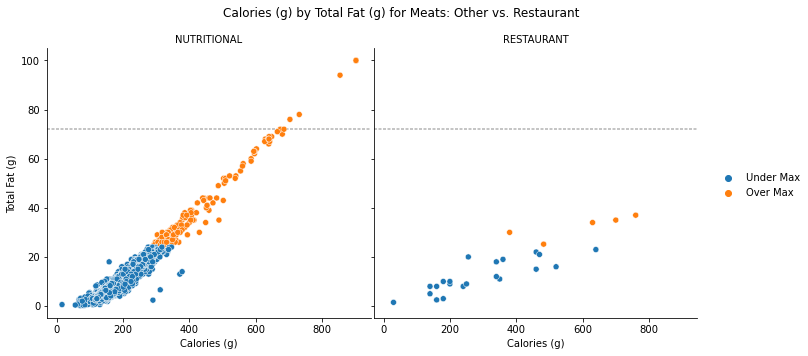

In [380]:
# fifth visualization 
# Dashed line represents total fat for the entire day 

#create relplot
rel = sns.relplot(data=dfp1, x='NUTR_CALORIES_g', y='NUTR_TOTAL_FAT_g', col='SOURCE_KEY', hue="DV_FATYN")
rel.fig.suptitle('Calories (g) by Total Fat (g) for Meats: Other vs. Restaurant')

rel.fig.subplots_adjust(top=.8)
rel._legend.set_title(" ")

(rel.map(plt.axhline, y=72, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Calories (g)", "Total Fat (g)")
  .set_titles("{col_name}")
  .tight_layout(w_pad=0))

This concludes the visualization portion of Milestone 5. 

Write up for Milestone 5

The purpose of this project was to explore nutritional information and compare calories, fat and sugar (and potentially other indicators) of foods that are prepared in restaurants to foods one could prepare at home and how each compares to Reference Daily Intake (RDI) information. For this, I used three data sources: a flat file with over 8800 entries of nutritional information of various food items, web scrapping data for Daily Value food recommendations from Wikipedia and API that included restaurant food information. 

These data sources were cleaned and merged and visualizations were created. The visualizations show that as fat grams increase, calories also increase. However, this relationship is stronger for non-restaurant food. In contrast, for restaurant food, fat seems to hold steadier as calories increase. At first, this may seem counter intuitive but the restaurant food is a single item and the nutritional information can be more than a single serving of food. 
Box plots of the food categories show that the Meat Group has the greatest difference between non-restaurant and restaurant food. Likewise, because the Meat Group was the largest group in terms of sample size, it become the main group of focus for subsequent visualizations. 

A bar chart showed that, within the Meat Group, Chicken had the highest caloric difference between non-restaurant and restaurant groups in contrast to the bar chart for fat, where Chicken had the smallest high caloric difference (compared to other groups). Because of this, I took a closer look at Chicken as a stand alone group, and it appeared that Chicken from the non-restaurant group had much higher fat than the restaurant group. Further investigation showed that the non-restaurant group was a single item while the restaurant group had more cases (1 vs. 5). This stresses the importance of understanding the visualization as well as adding counts to the bar charts. Initially I did have counts but struggled with the formatting of the values thus, as they were too long, I removed them in order to have the visualizations more readable. 

The final visualization compared the Meat category for total fat against calories for non-restaurant and restaurant groups with the data divided by being at over or under the DV Fat values. 

This project was very interesting to me and I think I learned many different lessons in terms of the data sources we select and different limitations of these sources and choices in how the data is cleaned  as well as in analysis like how we are deriving variables or assumptions that are made in terms of grouping/categorizing data. 
An interesting aspect of this project for me was realizing that API data can be limited in how it is constructed and/or maintained and how API data is the backend of different apps I use daily. This was very interesting to me as well as giving new insight in how we can be biased in our selection of API, such as not having sufficient documentation on it or selecting API that is more manageable or free or has only the variables we are interested (versus a more complete set of data). Likewise, I was impressed that my visualizations looked as they do as I felt I had many issues with my data. My API data was different than my original selection and the nutritional data needed more cleaning and better grouping to the free text field than I did for this project. These concerns lead to the main ethical concerns and considerations for analysis – it is often advantageous for us to tell a nice story with our data. However, we have to careful and diligent and strive to ensure that each step of the way we are taking care to understand the shortcomings of our sources, our cleaning process to ensure that others are not misled by our results. 
